In [1]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

data = [train, test]

print(train.columns.values)
print(train.head())

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3

In [5]:
train.info()
print("-"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


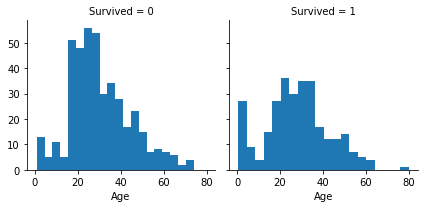

In [16]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

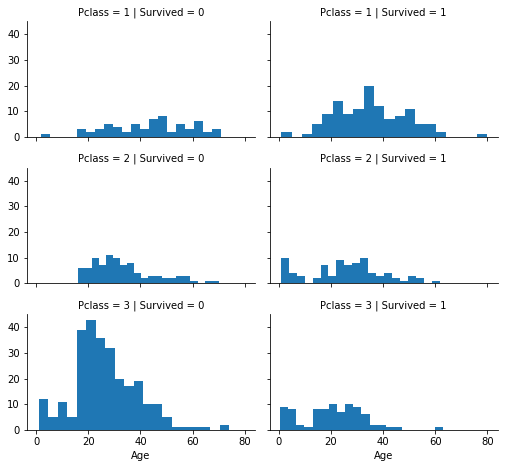

In [23]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

/Users/parvthakkar/opt/anaconda3/envs/p37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: row. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/parvthakkar/opt/anaconda3/envs/p37/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/parvthakkar/opt/anaconda3/envs/p37/lib/python3.7/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


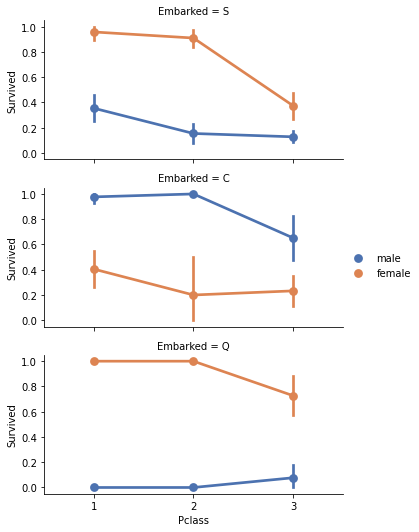

In [28]:
grid = sns.FacetGrid(train, 'Embarked', height=2.5, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/Users/parvthakkar/opt/anaconda3/envs/p37/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


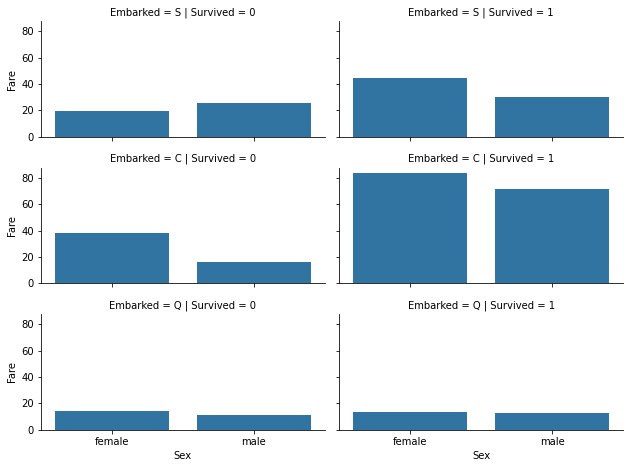

In [32]:
grid = sns.FacetGrid(data=train, col='Survived', row='Embarked', height=2.2, aspect=2)
grid.map(sns.barplot, 'Sex', 'Fare', ci=None)
grid.add_legend()

In [33]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
data = [train, test]

print(train.shape, test.shape)

(891, 10) (418, 9)


In [34]:
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [37]:
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
#     dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values('Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [39]:
title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [40]:
train = train.drop(['PassengerId', 'Name'], axis=1)
test = test.drop(['Name'], axis=1)
data = [train, test]

print(train.shape, test.shape)

(891, 9) (418, 9)


In [43]:
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


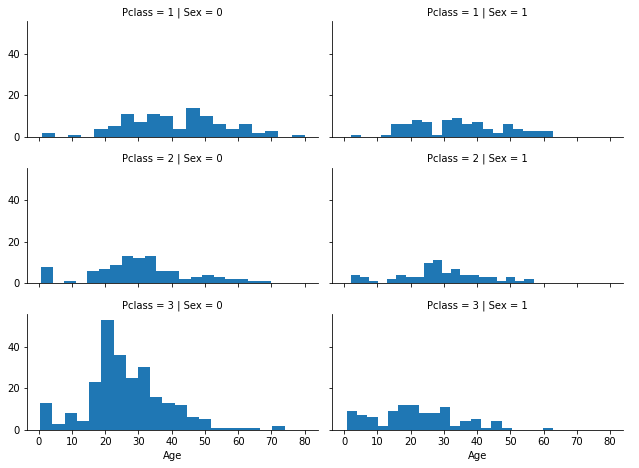

In [44]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', height=2.2, aspect=2)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

In [59]:
guess_age = np.zeros((2, 3))
print(guess_age)

for dataset in data:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset.loc[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1), 'Age'].dropna()
            
            age_guess = guess_df.median()
            guess_age[i, j] = int(age_guess/0.5 + 0.5)*0.5
            
    for i in range(2):
        for j in range(3):
            dataset.loc[(dataset['Age'].isna()) & (dataset['Sex'] == i) & (dataset['Pclass'] == j+1), 'Age'] = int(guess_age[i, j])
                        
    dataset['Age'] = dataset['Age'].astype(int)
            
print(guess_age)
train.info()

[[0. 0. 0.]
 [0. 0. 0.]]
[[42. 28. 24.]
 [41. 24. 22.]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


In [60]:
train['AgeRange'] = pd.cut(train['Age'], 5)
train[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values('AgeRange', ascending=True)

,AgeRange,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [63]:
for dataset in data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeRange
0,0,3,0,0,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,0,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [66]:
train = train.drop(['AgeRange'], axis=1)
data = [train, test]
print(train.shape)

(891, 9)


In [68]:
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values('Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [69]:
for dataset in data:
    dataset['isAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'isAlone'] = 1
    
train[['isAlone', 'Survived']].groupby(['isAlone'], as_index=False).mean().sort_values('Survived', ascending=False)

,isAlone,Survived
0,0,0.505650
1,1,0.303538


In [70]:
train = train.drop(['FamilySize', 'Parch', 'SibSp'], axis=1)
test = test.drop(['FamilySize', 'Parch', 'SibSp'], axis=1)
data = [train, test]

print(train.shape, test.shape)
train.head()

(891, 8) (418, 8)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,0,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,0,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [72]:
for dataset in data:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,0,0,3
1,2,2,1
2,0,0,3
3,2,2,1
4,6,2,3
5,0,0,3
6,3,3,1
7,0,0,3
8,0,0,3
9,0,0,2


In [73]:
embarked_freq = train.Embarked.dropna().mode()[0]
print(embarked_freq)

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_freq)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values('Survived', ascending=False)

S


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [74]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,0,3,0,0,7.2500,2,1,0,0
1,1,1,1,2,71.2833,0,3,0,2
2,1,3,1,0,7.9250,2,2,1,0
3,1,1,1,2,53.1000,2,3,0,2
4,0,3,0,2,8.0500,2,1,1,6


In [75]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    int64  
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    int64  
 6   Title      891 non-null    int64  
 7   isAlone    891 non-null    int64  
 8   Age*Class  891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         417 non-null    float64
 5

In [76]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Title        418 non-null    int64  
 7   isAlone      418 non-null    int64  
 8   Age*Class    418 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


In [78]:
train['FareRange'] = pd.cut(train['Fare'], 4)
train[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values('FareRange', ascending=True)

,FareRange,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [80]:
for dataset in data:
    dataset.loc[dataset['Fare'] <= 128.082, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 128.082) & (dataset['Fare'] <= 256.165), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 256.165) & (dataset['Fare'] <= 384.247), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 384.247, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareRange'], axis=1)
data = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,0,3,0,0,0,2,1,0,0
1,1,1,1,2,0,0,3,0,2
2,1,3,1,0,0,2,2,1,0
3,1,1,1,2,0,2,3,0,2
4,0,3,0,2,0,2,1,1,6


In [81]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,892,3,0,2,0,1,1,1,6
1,893,3,1,2,0,2,3,0,6
2,894,2,0,3,0,1,1,1,6
3,895,3,0,1,0,2,1,1,3
4,896,3,1,1,0,2,3,0,3


In [82]:
x_train = train.drop(['Survived'], axis=1)
y_train = train.Survived
x_test = test.drop(['PassengerId'], axis=1)

print(x_train.shape, y_train.shape, x_test.shape)

(891, 8) (891,) (418, 8)


In [90]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

score_lr = round(lr.score(x_train, y_train)*100, 2)
print(score_lr)

coeff = pd.DataFrame(train.columns.delete(0))
coeff.columns = ['Feature']
coeff['Correlation'] = pd.Series(lr.coef_[0])
coeff.sort_values('Correlation', ascending=False)

79.12


,Feature,Correlation
1,Sex,2.177097
5,Title,0.458427
6,isAlone,0.201277
3,Fare,0.000000
7,Age*Class,-0.082361
2,Age,-0.222273
4,Embarked,-0.261729
0,Pclass,-1.083865


In [91]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

score_svc = round(svc.score(x_train, y_train)*100, 2)
score_svc

80.92

In [92]:
# K Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

score_knn = round(knn.score(x_train, y_train)*100, 2)
score_knn

79.8

In [93]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)

score_gaussian = round(gaussian.score(x_train, y_train)*100, 2)
score_gaussian

78.0

In [94]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)

score_perceptron = round(perceptron.score(x_train, y_train)*100, 2)
score_perceptron

65.66

In [95]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)

score_linear = round(linear_svc.score(x_train, y_train)*100, 2)
score_linear

/Users/parvthakkar/opt/anaconda3/envs/p37/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


78.68

In [96]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

score_sgd = round(sgd.score(x_train, y_train)*100, 2)
score_sgd

77.22

In [97]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

score_dt = round(decision_tree.score(x_train, y_train)*100, 2)
score_dt

83.95

In [100]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

score_rf = round(random_forest.score(x_train, y_train)*100, 2)
score_rf

83.95

In [104]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [score_svc, score_knn, score_lr, score_rf, score_gaussian, score_perceptron, score_sgd,
             score_linear, score_dt]
})

models.sort_values('Score', ascending=False)

,Model,Score
3,Random Forest,83.95
8,Decision Tree,83.95
0,Support Vector Machines,80.92
1,KNN,79.80
2,Logistic Regression,79.12
7,Linear SVC,78.68
4,Naive Bayes,78.00
6,Stochastic Gradient Decent,77.22
5,Perceptron,65.66


In [105]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred
})

submission.to_csv("submission.csv", index=False)